In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import regex as re

In [2]:
fifa=pd.read_csv('fifa_clean.csv')

/Users/cnieto/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
fifa.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,lb,lcb,cb,rcb,rb,gk,log_value_eur,log_wage_eur,work_rate_attacking,work_rate_deffensive
0,158023,L. Messi,RW,93,93,78000000.0,320000.0,34,1987-06-24,170,...,61,50,50,50,61,19,18.172219,12.676076,2,1
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,61,60,60,60,61,19,18.598827,12.506177,3,2
2,20801,Cristiano Ronaldo,ST,91,91,45000000.0,270000.0,36,1985-02-05,187,...,60,53,53,53,60,20,17.622173,12.506177,3,1
3,190871,Neymar Jr,LW,91,91,129000000.0,270000.0,29,1992-02-05,175,...,62,50,50,50,62,20,18.675323,12.506177,3,2
4,192985,K. De Bruyne,CM,91,91,125500000.0,350000.0,30,1991-06-28,181,...,75,69,69,69,75,21,18.647816,12.765688,3,3


#### elimino las dos columnas de log que cree adrede para hacer un plot

In [6]:
fifa.drop(['log_value_eur','log_wage_eur'],axis=1,inplace=True)

In [7]:
fifa.dtypes

sofifa_id                int64
short_name              object
player_positions        object
overall                  int64
potential                int64
                         ...  
rcb                      int64
rb                       int64
gk                       int64
work_rate_attacking      int64
work_rate_deffensive     int64
Length: 96, dtype: object

In [8]:
fifa.shape

(19165, 96)

#### busqueda de correlaciones

In [21]:
plt.rcParams['figure.figsize'] = (40, 40)

<AxesSubplot:>

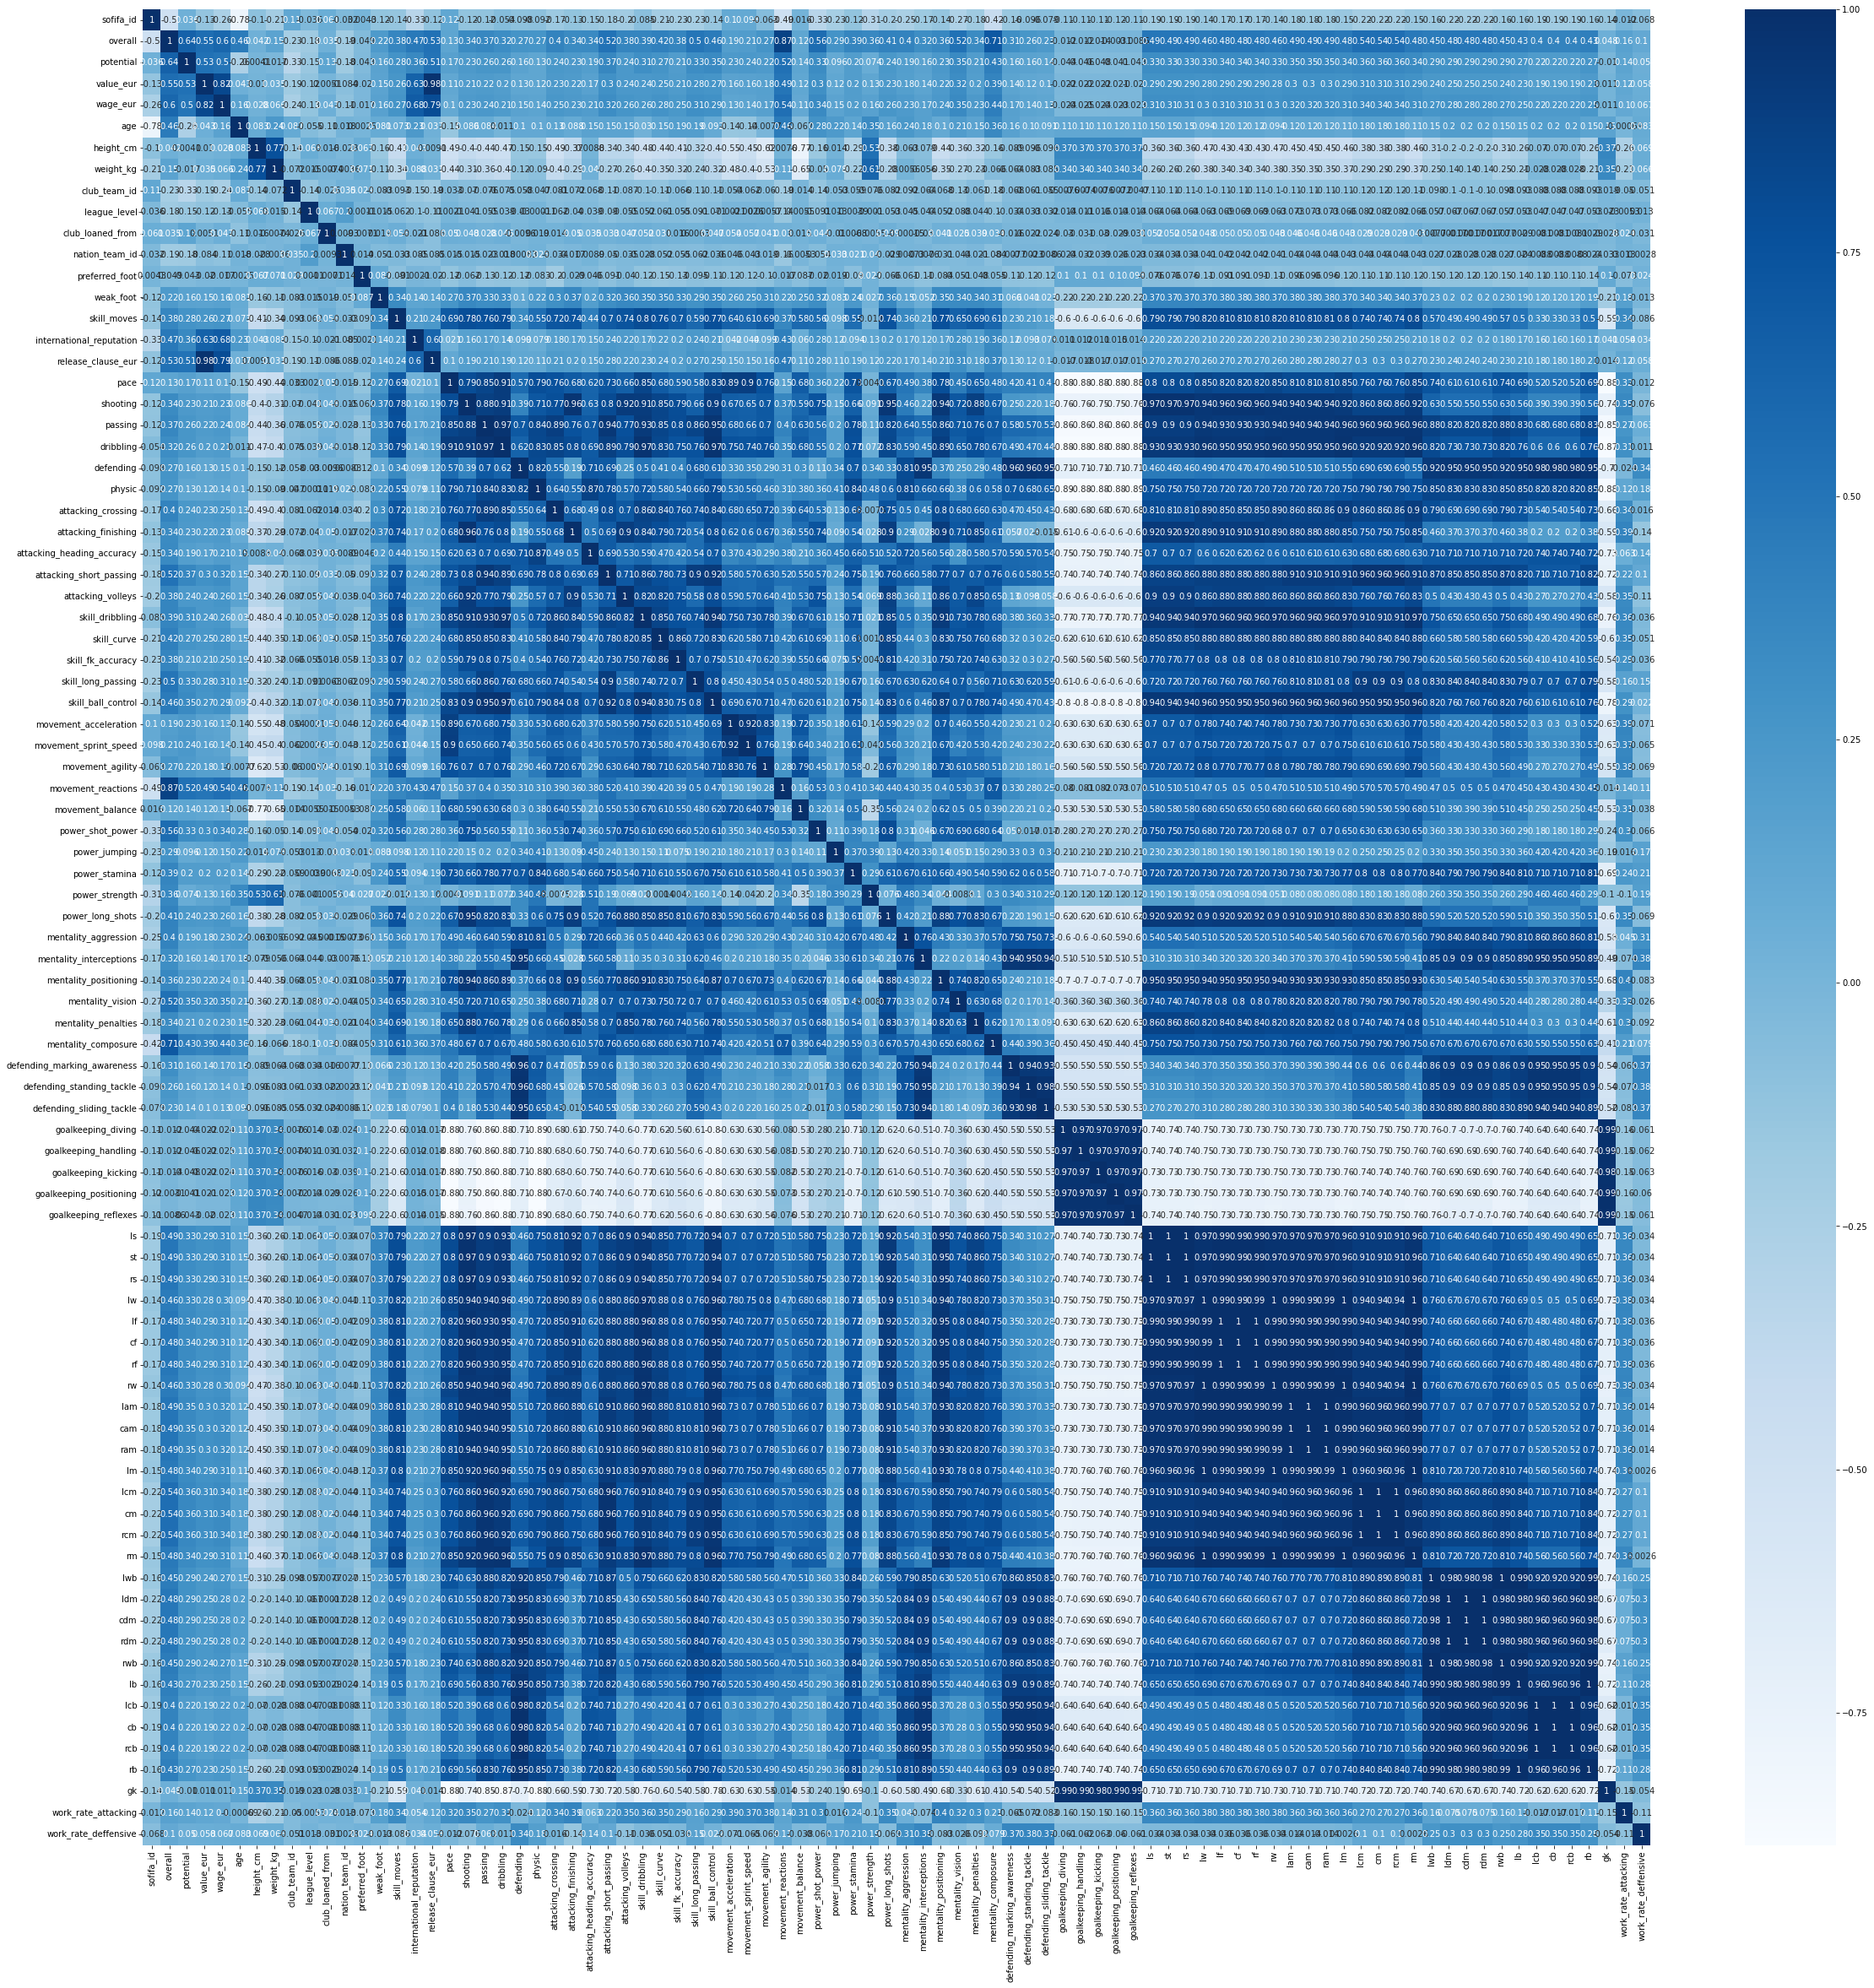

In [27]:
sns.heatmap(fifa.corr(), cmap='Blues', annot=True)

#### demasiadas variables. Nos centramos primero en las que muestran colinearlidad

<AxesSubplot:>

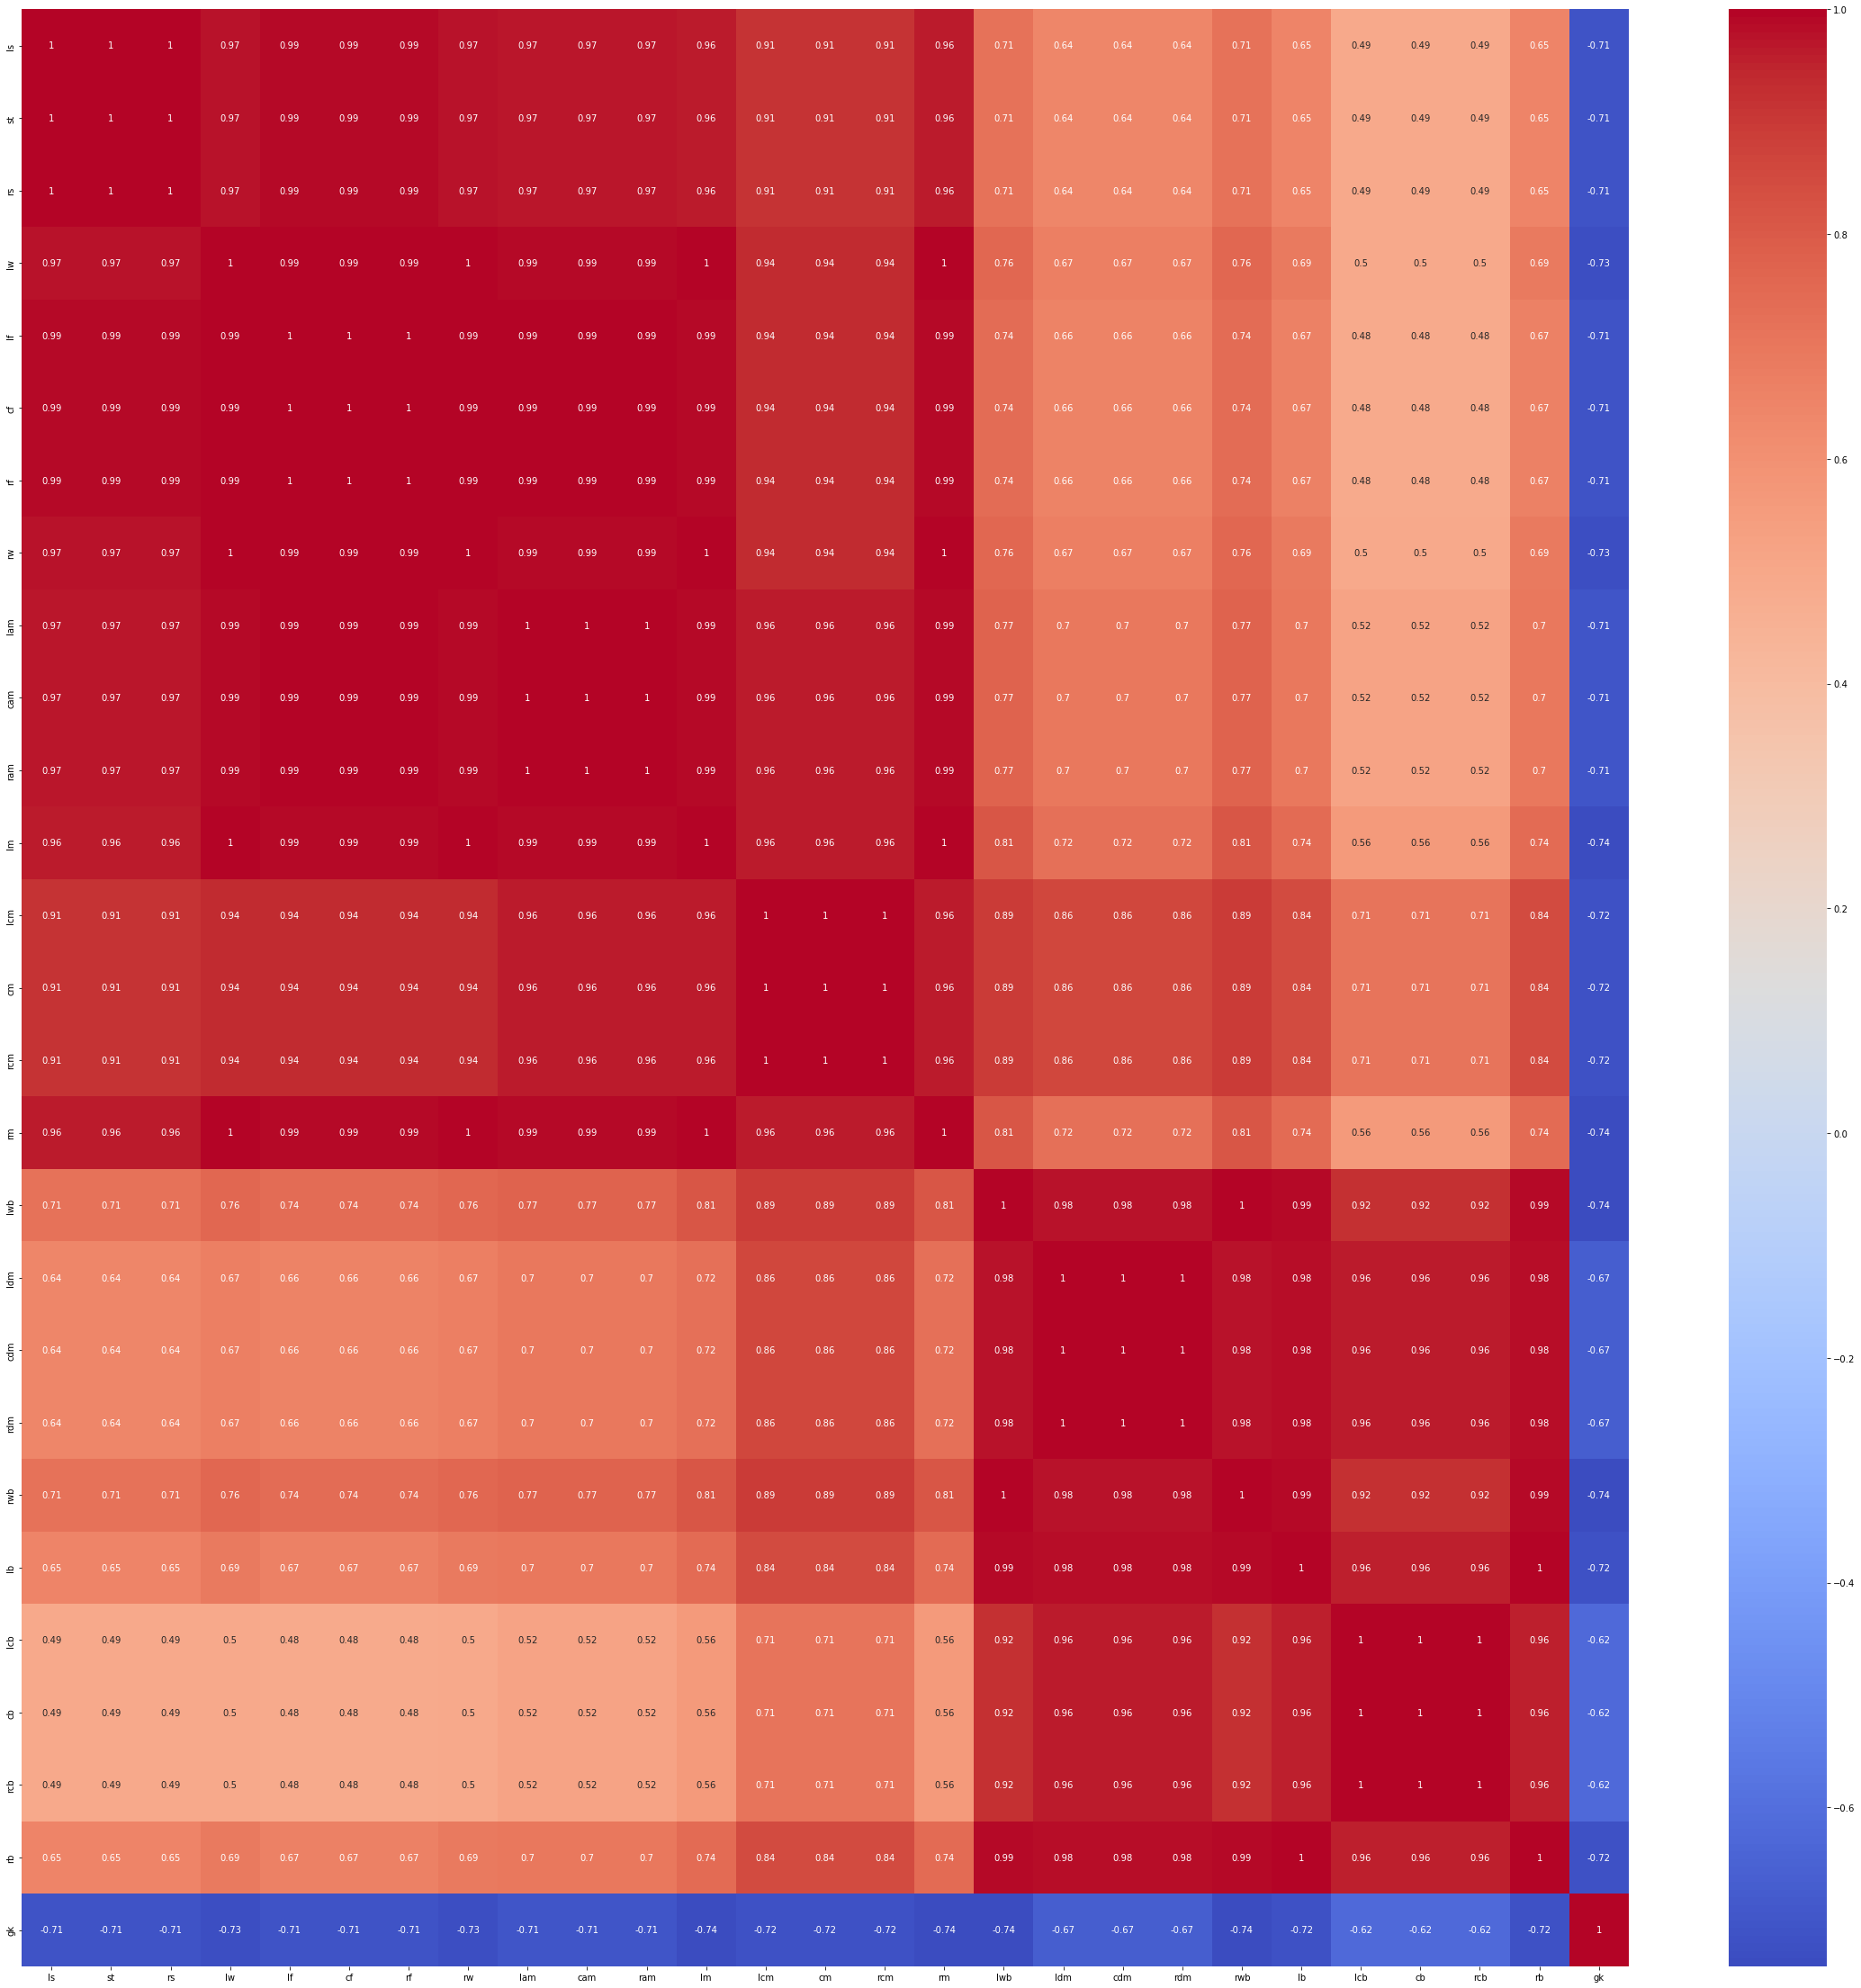

In [37]:
sns.heatmap(fifa[['ls','st','rs','lw','lf','cf','rf','rw','lam',
                      'cam','ram','lm','lcm','cm','rcm','rm','lwb',
                      'ldm','cdm','rdm','rwb','lb','lcb','cb',
                      'rcb','rb','gk']].corr(),cmap='coolwarm', annot=True)

In [38]:
## hay bloques claros de 3x3 con colinearlidad